# Deep Learning for Geo/Environmental sciences

<center><img src="../logo_2.png" alt="logo" width="500"/></center>

<em>*Created with ChapGPT</em>

## Lecture 7: Classification using Convolutional Neural Network

 - [Recap](#Recap)
 - [Example 1 - MNIST](#Example-1-MNIST-Digit-Classification)
 - [Example 2 - CIFAR-10](#Example-2-CIFAR-10-Image-Classification)

This tutorial is modified from
- fchollet's example at [Simple MNIST convnet](https://keras.io/examples/vision/mnist_convnet/)
- Ekta Sharma's example at [Simple Cifar10 CNN Keras code with 88% Accuracy](https://www.kaggle.com/code/ektasharma/simple-cifar10-cnn-keras-code-with-88-accuracy)

## Recap

Convolutional neural networks (CNNs) are a type of neural network that is designed to work with spatial data, such as images. They use convolutional layers to extract features from the data and pooling layers to reduce the dimensionality of the data. CNNs are widely used in computer vision tasks, such as image classification and object detection.


In this lecture, we will show how to build CNN models to classify images. We will go through this process by looking at two examples.

## Example 1 MNIST Digit Classification

### Prepare the data

MNIST, short for Modified National Institute of Standards and Technology database, is a widely used benchmark dataset in the field of machine learning and computer vision. 


It consists of a collection of **28x28 pixel grayscale** images of handwritten digits (0 through 9), along with corresponding labels indicating the digit each image represents.

 Originally constructed from a blend of NIST's datasets, MNIST has become a standard dataset for testing and benchmarking machine learning algorithms, particularly for tasks like digit recognition and classification.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras import datasets, layers
from keras.utils import to_categorical

### Load the data and split it between train and test sets

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
# Scale images to the [0, 1] range
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

### Convert class vectors to binary class matrices

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
class_names = [str(digit) for digit in range(10)]

### Visualizing some of the images from the training dataset

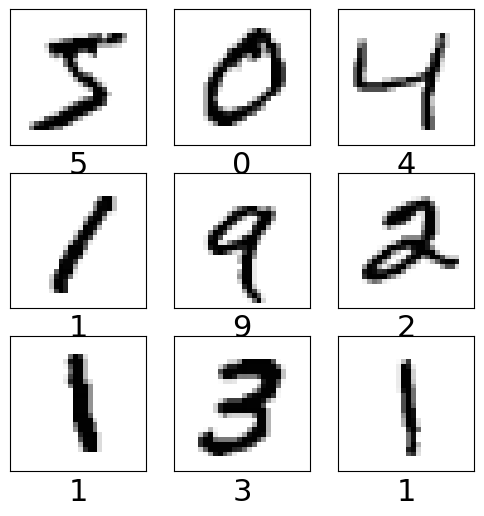

In [11]:
plt.figure(figsize=[6,6])
for i in range (9):    # for first 25 images
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[np.argmax(train_labels[i])],fontsize=22)

plt.show()


### Likelihood and softmax

Keep in mind, we are essentially using CNN to approximate a function $y=f(x)$. For classification purpose, the input $x$ is an image and the output is a label (for example, $y\in\{0,1,2\cdots9\}$ is a digit for the MNIST dataset in example 1 and $y\in\{dog,\cdots,plane\}$ is a string for the CIFAR 10 dataset in example 2). 

However, we have be so used to deal with continuous real-valued functions (as in the regression lecture)! What can we do with an output of digit/string?

**Key idea**: Instead of using the label as the output, we can use, equivalently, the conditional probability, i.e., the _likelihood_, of the label $Pr(y|x)$, which of course has a real value. 

We introduce the **softmax** activation function, defined as:

$$\text{softmax}(\mathbf{z})_i=\frac{e^{z_i}}{\sum_{j=1}^N e^{z_j}}$$

- $softmax(\mathbf{z})_i$ is the $i$th element of the output vector.
- $N$ is the number of classes.
- $z_i$ is the $i$th element of the input vector.

Then the likelihood that input $x$ has lebel $y=i$ is:
$$Pr(y=i|x)=\text{softmax}(f(x))_i$$

**Example**: Suppose we have three classes (A, B, C) and the raw scores from a model are [3.0, 1.0, 0.2]. After applying softmax, we might get probabilities like [0.836, 0.113, 0.051]. This suggests a high confidence in class A, moderate confidence in class B, and low confidence in class C. 

We can build a model by using softmax in the last layer to convert the score into the likelihood.

In [12]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)  )
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

/Users/watson-parris/miniconda3/envs/sio209_dev/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-29 14:26:39.682634: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-04-29 14:26:39.682707: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-04-29 14:26:39.682723: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-04-29 14:26:39.682780: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-29 14:26:39.682820: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow d

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,186 (196.04 KB)

 Trainable params: 50,186 (196.04 KB)

 Non-trainable params: 0 (0.00 B)

## Categorical loss function

The loss function for categorical tasks is different from that for regression tasks. For classification tasks, we often use the **categorical cross-entropy** loss function, which is defined as:

Categorical Cross-Entropy = $-\sum_{i=1}^{N} y_i \log(p_i)$

where:
- $N$ is the number of classes
- $y_i$ is the true label (one-hot encoded) for class $i$
- $p_i$ is the predicted probability for class $i$

The categorical cross-entropy loss function measures the difference between the true label and the predicted probability distribution. It penalizes the model more when it makes a high-confidence wrong prediction.

## Categorical metrics

The accuracy metric is used to evaluate the performance of a classification model. It is defined as the proportion of correct predictions to the total number of predictions made.

Accuracy = $\frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$

Other metrics like precision, recall, and F1-score can also be used to evaluate the performance of a classification model. For a binary classification problem, the model can either correctly predict a positive or negative class. 
 - The precision metric measures the proportion of true positive predictions to the total number of positive predictions made. 
 - The recall metric measures the proportion of true positive predictions to the total number of actual positive instances.
 - The F1-score is the harmonic mean of precision and recall.

These cane be extended to multi-class classification problems by averaging the metrics across all classes.

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_images, train_labels, batch_size=128, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


2024-04-29 14:38:37.887399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-04-29 14:38:37.888875: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7933 - loss: 0.6617 - val_accuracy: 0.9756 - val_loss: 0.0843
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9680 - loss: 0.1041 - val_accuracy: 0.9842 - val_loss: 0.0525
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9766 - loss: 0.0776 - val_accuracy: 0.9875 - val_loss: 0.0410
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9812 - loss: 0.0614 - val_accuracy: 0.9888 - val_loss: 0.0351
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9823 - loss: 0.0553 - val_accuracy: 0.9878 - val_loss: 0.0357
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9834 - loss: 0.0509 - val_accuracy: 0.9891 - val_loss: 0.0344
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9859 - loss: 0.0450 - val_accuracy: 0.9891 - val_loss: 0.0316
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9857 - loss: 0.0432 - val_accuracy: 0.990

### Visualizing the Evaluation

We can plot:
- Loss Curve to compare the training Loss with the testing Loss over increasing epochs.
- Accuracy Curve to Compare the training accuracy with the testing accuracy over increasing epochs.


Text(0.5, 1.0, 'Loss Curves')

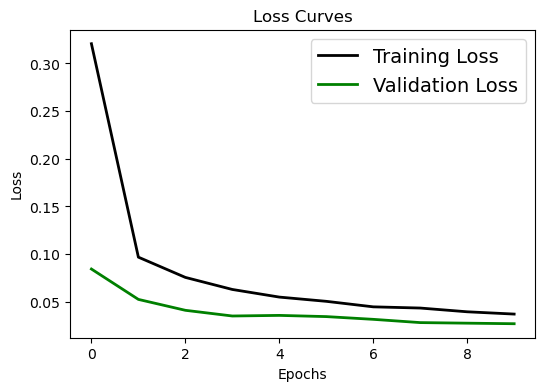

In [14]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
# plt.yscale('log')
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

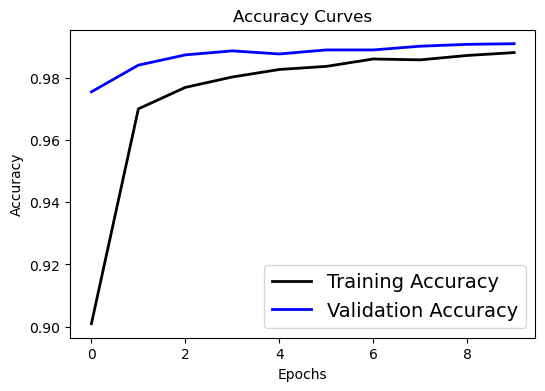

In [15]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

## Evaluate the trained model

We use the trained model to predict the images in the testing data.

In [16]:
# Making the Predictions
pred = model.predict(test_images)

149/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

2024-04-29 14:41:58.974396: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Once we get 'pred', the likelihood of the input image being 0, 1, ..., or 9, we will simply choose the digit corresponding to the largest likelihood.

In [17]:
# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)

Now we can visualise the predictions and compare them with the ground truth.

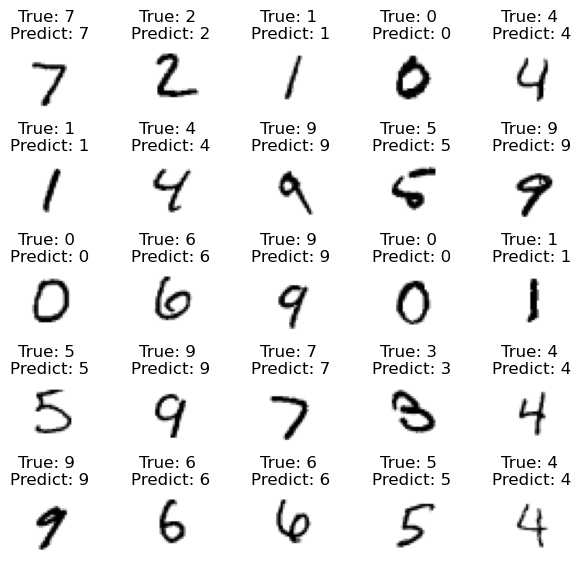

In [18]:
fig, axes = plt.subplots(5, 5, figsize=(7,7))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i], cmap=plt.cm.binary)
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]), fontsize = 12)
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## Confusion matrix

A more quantitative way to evaluate the performance of a classification model is to use a confusion matrix. A confusion matrix is a table that shows the number of true positive, true negative, false positive, and false negative predictions made by the model.

/var/folders/x3/vhgm155938j8q97fv4kz3mv80000gn/T/ipykernel_31975/3437774296.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.setp(plt.gca(), xticklabels=class_names, yticklabels=class_names, xticks=np.arange(0.5, 10.5), yticks=np.arange(0.5, 10.5),
/var/folders/x3/vhgm155938j8q97fv4kz3mv80000gn/T/ipykernel_31975/3437774296.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.setp(plt.gca(), xticklabels=class_names, yticklabels=class_names, xticks=np.arange(0.5, 10.5), yticks=np.arange(0.5, 10.5),


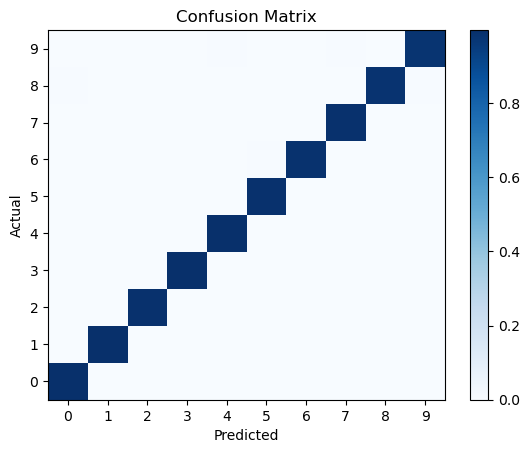

In [19]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), pred_classes, normalize='true')
plt.pcolormesh(conf_matrix, cmap='Blues')
plt.setp(plt.gca(), xticklabels=class_names, yticklabels=class_names, xticks=np.arange(0.5, 10.5), yticks=np.arange(0.5, 10.5),
         xlabel='Predicted', ylabel='Actual', title='Confusion Matrix')
plt.colorbar()
plt.show()

### Receiver Operating Characteristic (ROC) curve

The ROC curve is a graphical representation of the true positive rate (sensitivity) versus the false positive rate (1-specificity) for a binary classification model at various threshold settings. The area under the ROC curve (AUC) is a measure of the model's performance.

The AUC is a measure of how well the model can distinguish between classes. A model with an AUC of 1 is perfect, while a model with an AUC of 0.5 is no better than random guessing.

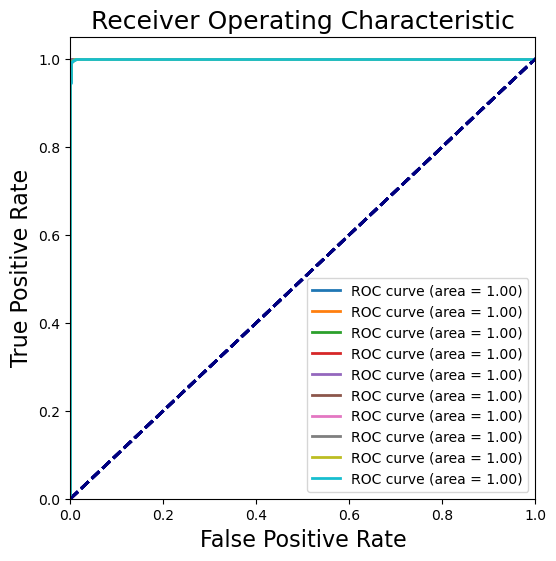

In [20]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=[6,6])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic', fontsize=18)
plt.legend(loc="lower right")

## Evaluate the trained model

Hurrah! The CNN prediction is nearly perfect. 

## Class balance

In a classification problem, the distribution of classes in the dataset can have a significant impact on the model's performance. If the classes are imbalanced, the model may be biased towards the majority class and perform poorly on the minority class.

First, let's take a look at the portions of digits in the original dataset.

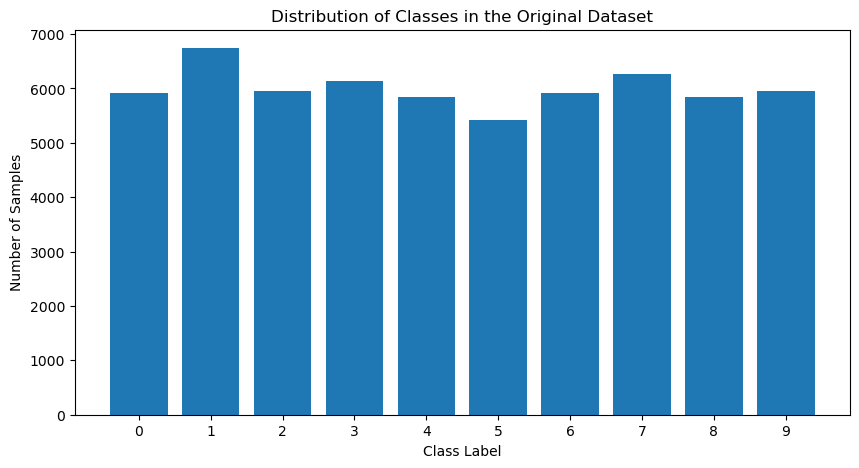

In [21]:
# Calculate the total number of samples in the imbalanced dataset
total_samples = len(train_labels)

# Calculate the number of samples in each class in the imbalanced dataset
class_counts = np.sum(train_labels, axis=0)

# Calculate the proportions of each class
class_proportions = class_counts / total_samples * 100

# Plot the proportions
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts)
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Distribution of Classes in the Original Dataset')
plt.show()

As you can see, while the percentage is not exactly the same for different classes, the difference is reasonably small.

### Imbalanced Data

Now, let's create a dataset where the number of samples in each class is not even close, making it imbalanced. 

In [ ]:
# Load MNIST data
(train_images, train_labels), (_, _) = mnist.load_data()

# Scale images to the [0, 1] range
train_images = train_images.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
train_images = np.expand_dims(train_images, -1)


# Convert labels to one-hot encoded format
train_labels_one_hot = to_categorical(train_labels,num_classes)

# Define the proportion for each class (make it imbalanced)
proportions = {0: 0.14, 1: 0.2, 2: 0.057, 3: 0.36, 4: 0.05, 5: 0.001, 6: 0.01, 7: 0.002, 8: 0.015, 9: 0.165}
print(sum(proportions.values()))
# Calculate the number of samples needed for each class
num_samples_per_class = {}
for label, proportion in proportions.items():
    num_samples_per_class[label] = int(len(train_labels) * proportion)

# Create an imbalanced dataset
imbalanced_train_images = []
imbalanced_train_labels = []
for label, num_samples in num_samples_per_class.items():
    indices = np.where(train_labels == label)[0]
    selected_indices = np.random.choice(indices, size=num_samples, replace=True)
    imbalanced_train_images.extend(train_images[selected_indices])
    imbalanced_train_labels.extend(train_labels_one_hot[selected_indices])

# Convert lists to numpy arrays
imbalanced_train_images = np.array(imbalanced_train_images)
imbalanced_train_labels = np.array(imbalanced_train_labels)

# Visualize the proportion of each class
class_counts = np.bincount(imbalanced_train_labels.argmax(axis=1))
class_names = [str(i) for i in range(10)]

1.0


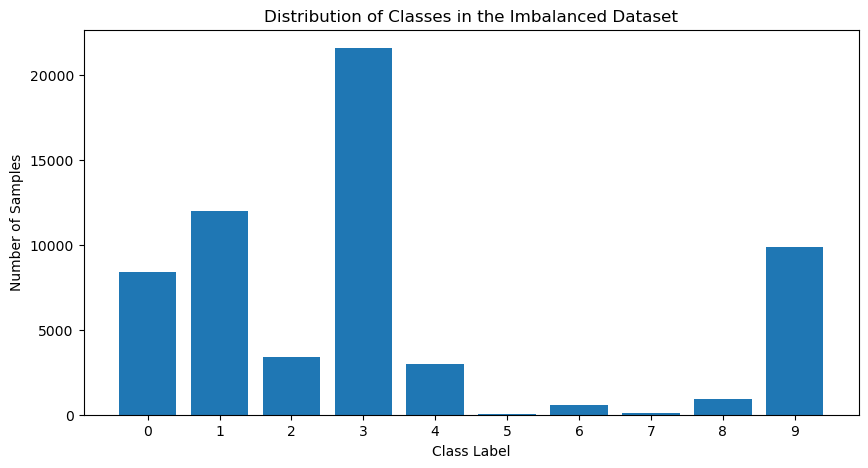

In [22]:
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts)
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Distribution of Classes in the Imbalanced Dataset')
plt.show()

What if we use this imbalanced data for classification? We'll still use the same architecture for the model and test data but train the model with the imbalanced data.

In [23]:
model2 = Sequential()

model2.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model2.summary()

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history2 = model2.fit(imbalanced_train_images, imbalanced_train_labels, batch_size=128, epochs=10,  shuffle=True,
                    validation_data=(test_images, test_labels))

/Users/watson-parris/miniconda3/envs/sio209_dev/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,186 (196.04 KB)

 Trainable params: 50,186 (196.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2024-04-29 14:50:09.203324: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8402 - loss: 0.5156 - val_accuracy: 0.8654 - val_loss: 0.4212
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9807 - loss: 0.0633 - val_accuracy: 0.9039 - val_loss: 0.2945
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9871 - loss: 0.0412 - val_accuracy: 0.9349 - val_loss: 0.1993
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9905 - loss: 0.0298 - val_accuracy: 0.9401 - val_loss: 0.1948
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9917 - loss: 0.0247 - val_accuracy: 0.9418 - val_loss: 0.1906
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 0.9534 - val_loss: 0.1529
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9946 - loss: 0.0178 - val_accuracy: 0.9494 - val_loss: 0.1866
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9947 - loss: 0.0177 - val_accuracy: 0.951

Text(0.5, 1.0, 'Loss Curves')

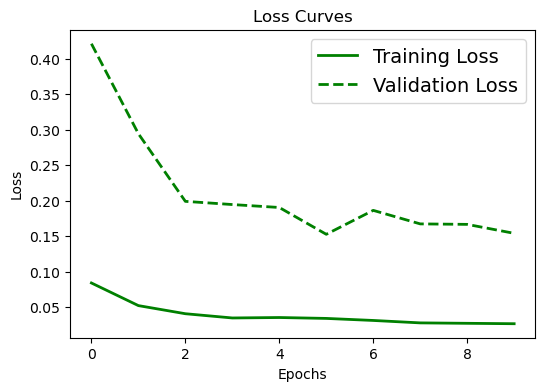

In [24]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.plot(history2.history['val_loss'], 'green', linewidth=2.0,linestyle='--')
plt.legend(['Training Loss', 'Validation Loss','Training Loss (imbalanced data)', 'Validation Loss (imbalanced data)'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
# plt.yscale('log')
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

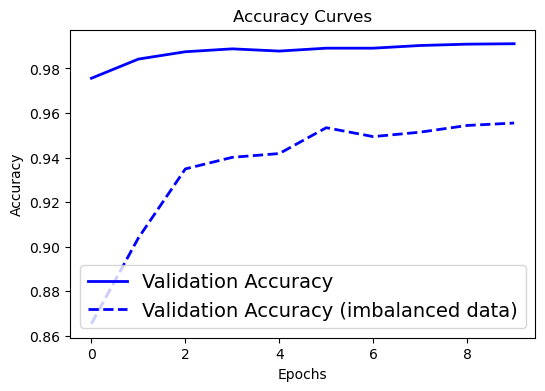

In [25]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.plot(history2.history['val_accuracy'], 'blue', linewidth=2.0,linestyle = '--')
plt.legend(['Validation Accuracy', 'Validation Accuracy (imbalanced data)'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

144/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

2024-04-29 14:52:18.069731: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


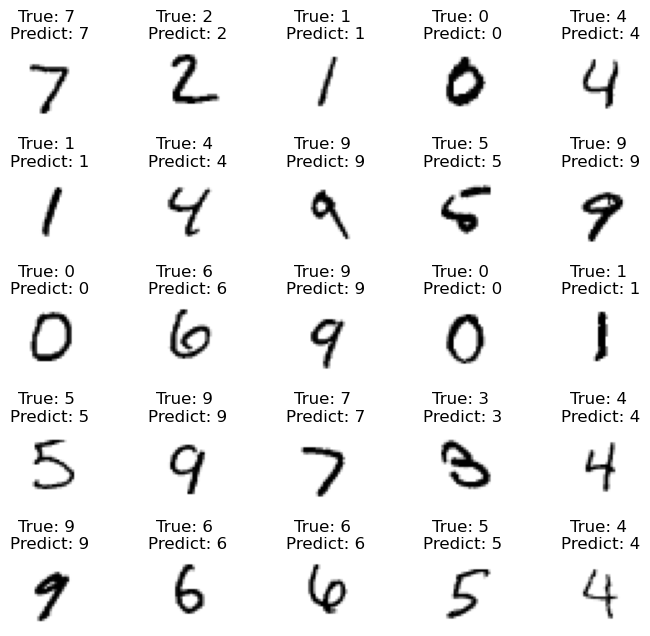

In [26]:
# Making the Predictions
pred = model2.predict(test_images)
# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)

fig, axes = plt.subplots(5, 5, figsize=(8,8))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i], cmap=plt.cm.binary)
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]), fontsize = 12)
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

/var/folders/x3/vhgm155938j8q97fv4kz3mv80000gn/T/ipykernel_31975/3565197907.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.setp(plt.gca(), xticklabels=class_names, yticklabels=class_names, xticks=np.arange(0.5, 10.5), yticks=np.arange(0.5, 10.5),
/var/folders/x3/vhgm155938j8q97fv4kz3mv80000gn/T/ipykernel_31975/3565197907.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.setp(plt.gca(), xticklabels=class_names, yticklabels=class_names, xticks=np.arange(0.5, 10.5), yticks=np.arange(0.5, 10.5),


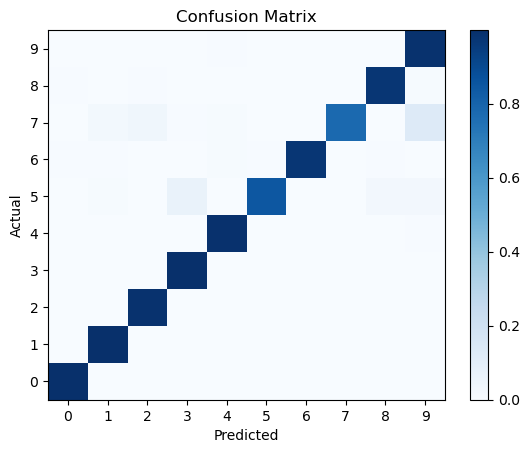

In [27]:
# We can also visualize the confusion matrix to see how well the model is performing:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), pred_classes, normalize='true')
plt.pcolormesh(conf_matrix, cmap='Blues')
plt.setp(plt.gca(), xticklabels=class_names, yticklabels=class_names, xticks=np.arange(0.5, 10.5), yticks=np.arange(0.5, 10.5),
         xlabel='Predicted', ylabel='Actual', title='Confusion Matrix')
plt.colorbar()
plt.show()


### Dealing with Imbalanced Data

We can improve the model performance by using techniques like oversampling, undersampling, or using class weights to handle imbalanced data.


Oversampling involves increasing the number of samples in the minority class by generating synthetic samples. Undersampling involves reducing the number of samples in the majority class by randomly selecting a subset of samples. 



Class weights are used to assign higher weights to the minority class samples during training. This helps the model to focus more on the minority class and improve its performance.

In [29]:
# Training label weights
total_samples = len(imbalanced_train_labels)
  
# Calculate the class weights
class_weights = {}
for label, num_samples in num_samples_per_class.items():
    class_weights[label] = total_samples / (num_classes * num_samples)

class_weights

{0: 0.7142857142857143,
 1: 0.5,
 2: 1.7543859649122806,
 3: 0.2777777777777778,
 4: 2.0,
 5: 100.0,
 6: 10.0,
 7: 50.0,
 8: 6.666666666666667,
 9: 0.6060606060606061}

In [30]:
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history2 = model2.fit(imbalanced_train_images, imbalanced_train_labels, batch_size=128, epochs=10,  shuffle=True,
                    validation_data=(test_images, test_labels), class_weight=class_weights)

Epoch 1/10


2024-04-29 14:55:43.643944: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9924 - loss: 0.0455 - val_accuracy: 0.9788 - val_loss: 0.0762
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9899 - loss: 0.0385 - val_accuracy: 0.9783 - val_loss: 0.0884
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9897 - loss: 0.0436 - val_accuracy: 0.9741 - val_loss: 0.1058
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9890 - loss: 0.0397 - val_accuracy: 0.9774 - val_loss: 0.0879
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9895 - loss: 0.0280 - val_accuracy: 0.9779 - val_loss: 0.0856
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9916 - loss: 0.0251 - val_accuracy: 0.9772 - val_loss: 0.0963
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9923 - loss: 0.0268 - val_accuracy: 0.9769 - val_loss: 0.0970
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9920 - loss: 0.0197 - val_accuracy: 0.978

155/313 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step

2024-04-29 14:57:24.732806: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/var/folders/x3/vhgm155938j8q97fv4kz3mv80000gn/T/ipykernel_31975/288876898.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.setp(plt.gca(), xticklabels=class_names, yticklabels=class_names, xticks=np.arange(0.5, 10.5), yticks=np.arange(0.5, 10.5),
/var/folders/x3/vhgm155938j8q97fv4kz3mv80000gn/T/ipykernel_31975/288876898.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.setp(plt.gca(), xticklabels=class_names, yticklabels=class_names, xticks=np.arange(0.5, 10.5), yticks=np.arange(0.5, 10.5),


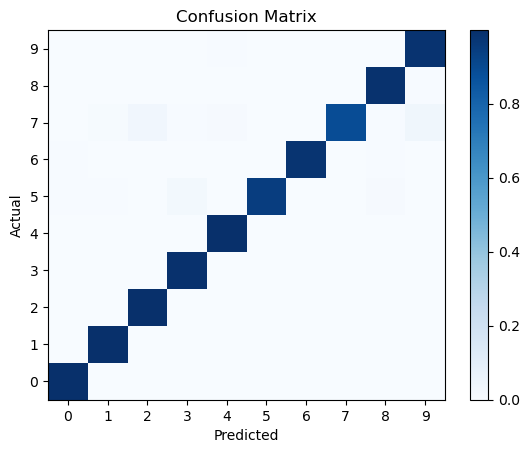

In [31]:
from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)
pred_classes = np.argmax(pred, axis=1)

conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), pred_classes, normalize='true')
plt.pcolormesh(conf_matrix, cmap='Blues')
plt.setp(plt.gca(), xticklabels=class_names, yticklabels=class_names, xticks=np.arange(0.5, 10.5), yticks=np.arange(0.5, 10.5),
         xlabel='Predicted', ylabel='Actual', title='Confusion Matrix')
plt.colorbar()
plt.show()

This looks good! The model is able to predict the digits with high accuracy even with imbalanced data. This simple example demonstrates the importance of handling imbalanced data in classification tasks.

## Example 2 CIFAR 10 Image Classification

## Prepare the data

We now consider a more complex dataset: CIFAR-10 which stands for the Canadian Institute for Advanced Research 10, with 60,000 images in total.

Unlike MNIST, CIFAR-10 consists of color images, each with a resolution of 32x32 pixels, classified into 10 different classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. 

In [32]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

# Checking the number of unique classes 
print(np.unique(train_labels))
print(np.unique(test_labels))

# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Again, we can take a look at some of the images:

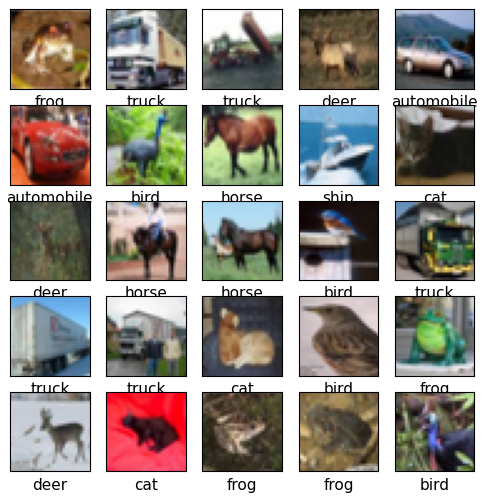

In [33]:
plt.figure(figsize=[6,6])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]], fontsize=11)

plt.show()

Data Preprocessing
- The reason for Standardizing/Normalizing is to convert all pixel values to values between 0 and 1.
- The reason for converting type to float is that to_categorical (one hot encoding) needs the data to be of type float by default.
- The reason for using to_categorical is that the loss function that we will be using in this code (categorical_crossentropy) when compiling the model needs data to be one hot encoded.



In [34]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One hot encoding the target class (labels)
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [35]:
# Let's build a CNN model for the CIFAR-10 dataset. It's bigger than the MNIST dataset, so we need a more complex model.

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

/Users/watson-parris/miniconda3/envs/sio209_dev/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [36]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

### Fitting the Model

- Batch Size is used for Adam optimizer.
- Epochs - One epoch is one complete cycle (forward pass + backward pass).


In [37]:
# Note the smaller batch size because of the larger dataset and larger model
history = model.fit(train_images, train_labels, batch_size=64, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


2024-04-29 15:04:39.851766: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.3255 - loss: 2.1146 - val_accuracy: 0.5073 - val_loss: 1.4325
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5584 - loss: 1.2323 - val_accuracy: 0.6444 - val_loss: 0.9988
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6464 - loss: 1.0000 - val_accuracy: 0.6867 - val_loss: 0.8722
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6858 - loss: 0.8923 - val_accuracy: 0.6792 - val_loss: 0.9037
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7142 - loss: 0.8131 - val_accuracy: 0.7108 - val_loss: 0.8282
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7373 - loss: 0.7485 - val_accuracy: 0.7475 - val_loss: 0.7213
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7534 - loss: 0.7024 - val_accuracy: 0.7697 - val_loss: 0.6679
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7635 - loss: 0.6756 - val_accurac

Apparently, the training takes much longer time than the MNIST dataset! 

## Visualizing the Evaluation

Text(0.5, 1.0, 'Loss Curves')

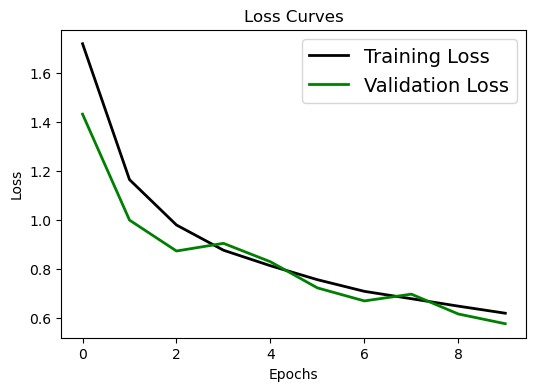

In [38]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

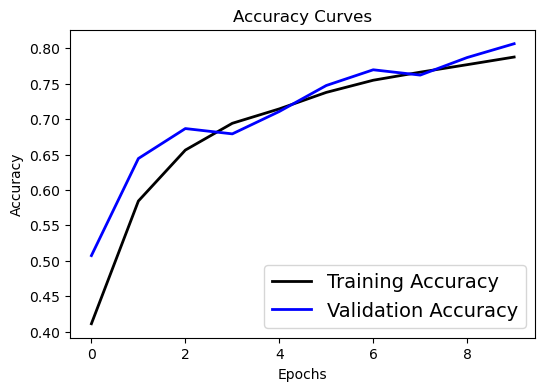

In [39]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)



Oops. Looks like within 10 epochs the training process is not that satisfying. Try to change the epoch number in the CIFAR example to a larger value (say 100) and rerun the training process after class.

Still, let's take 25 images from the testing data and see how many of it we predicted correctly.

In [40]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 1:10 226ms/step

2024-04-29 15:10:11.747337: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[2.7353668e-03 2.3133479e-04 1.0610120e-02 ... 8.0118870e-04
  1.6054312e-03 2.3801514e-04]
 [1.8341620e-04 7.8422613e-03 3.2405971e-08 ... 3.0418954e-09
  9.9143434e-01 5.3995795e-04]
 [5.5369097e-03 2.1574138e-02 8.1437101e-05 ... 3.4253240e-05
  9.6215332e-01 1.0320044e-02]
 ...
 [1.6217772e-06 4.3777609e-07 6.8318582e-04 ... 9.3253347e-04
  1.1261290e-06 1.8331649e-06]
 [1.6690958e-02 9.7707719e-01 1.5053808e-03 ... 2.9198280e-05
  3.5964057e-04 1.3421811e-03]
 [2.1974201e-06 8.5326383e-07 1.1426767e-04 ... 9.9250609e-01
  5.0851980e-07 3.2652207e-07]]
[3 8 8 ... 5 1 7]


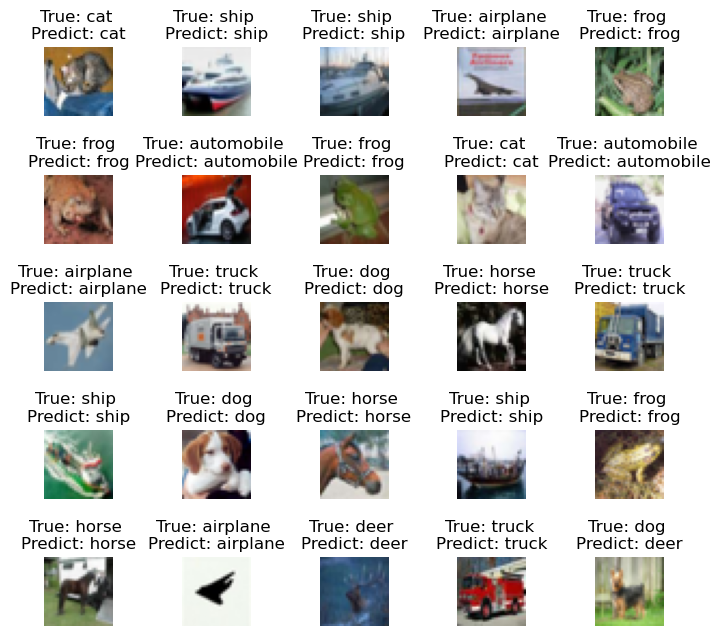

In [41]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(8,8))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

/var/folders/x3/vhgm155938j8q97fv4kz3mv80000gn/T/ipykernel_31975/193103630.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.setp(plt.gca(), xticklabels=class_names, yticklabels=class_names, xticks=np.arange(0.5, 10.5), yticks=np.arange(0.5, 10.5),
/var/folders/x3/vhgm155938j8q97fv4kz3mv80000gn/T/ipykernel_31975/193103630.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.setp(plt.gca(), xticklabels=class_names, yticklabels=class_names, xticks=np.arange(0.5, 10.5), yticks=np.arange(0.5, 10.5),


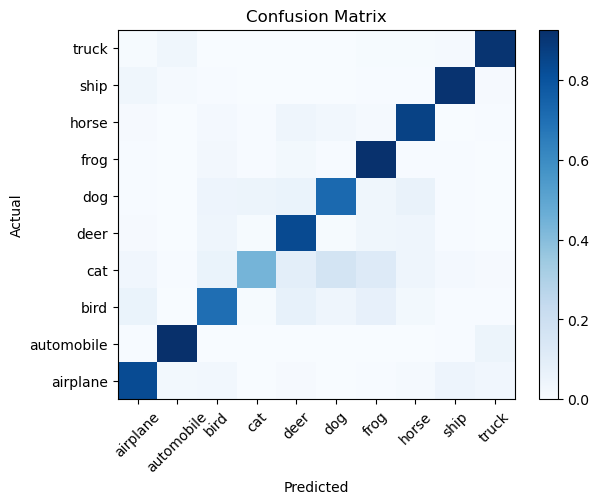

In [42]:
# We can also visualize the confusion matrix to see how well the model is performing:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), pred_classes, normalize='true')
plt.pcolormesh(conf_matrix, cmap='Blues')
plt.setp(plt.gca(), xticklabels=class_names, yticklabels=class_names, xticks=np.arange(0.5, 10.5), yticks=np.arange(0.5, 10.5),
         xlabel='Predicted', ylabel='Actual', title='Confusion Matrix')
plt.gca().xaxis.set_tick_params(rotation=45)
plt.colorbar()
plt.show()


## Summary


We have learned from two examples how to use CNN for image classification. Evaluation of classification models can be done using metrics like accuracy, precision, recall, F1-score, confusion matrix, and ROC curve. 

Depending on the task we might focus more on one metric than the other. For example, in a medical diagnosis task, we might want to minimize false negatives, so we would focus more on recall. For a spam detection task, we might want to minimize false positives, so we would focus more on precision.



Handling imbalanced data is important for improving the performance of classification models. Techniques like oversampling, undersampling, and class weights can be used to handle imbalanced data.